# Data Science and Visualization (RUC F2023)

## Lecture 7: Clustering I

 # K-Means
 
 We use the Age-Income data set from this book:
 
 Jay Gendron, Introduction to R for Business Intelligence, Packt Publishing Ltd., 2016
 

## 0. Importing the Required Libraries and Data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('C:/Data/Ch5_age_income_data.csv')
data.head()

,bin,age,income
0,60-69,64,87083.236510
1,30-39,33,76807.824635
2,20-29,24,12043.598766
3,30-39,33,61972.002432
4,70-79,78,60120.315192


Let's take a look at the dimensionality and basic statistics of the data:

In [59]:
data.shape

(8105, 3)

In [60]:
data.describe()

,age,income
count,8105.000000,8105.000000
mean,42.847502,66223.570197
std,17.522900,27786.584020
min,18.000000,233.633814
25%,28.000000,43792.680307
50%,39.000000,65059.991274
75%,55.000000,85944.726714
max,89.000000,178676.368483


## 1. Feature Selection

In [3]:
X = data[['age', 'income']]

## 2. Model Building

We use K=3 for K-Means clustering:

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

## 3. Clustering Result

After calling the **fit()** function, the clustering is done, as it is *unsupervised* learning. The clustering result is stored in an array called **labels_**. It stores a cluster label for each data point in X.

In [63]:
kmeans.labels_

array([2, 1, 0, ..., 0, 0, 2])

See the length of this labels_ array:

In [64]:
len(kmeans.labels_)

8105

Each cluster's (virtual) center is also stored, in another array called **cluster_centers_**:

In [65]:
kmeans.cluster_centers_

array([[4.25577191e+01, 3.67749988e+04],
       [4.58945774e+01, 6.98986081e+04],
       [3.80627593e+01, 1.03859873e+05]])

### Result Visualization

Text(0, 0.5, 'Income')

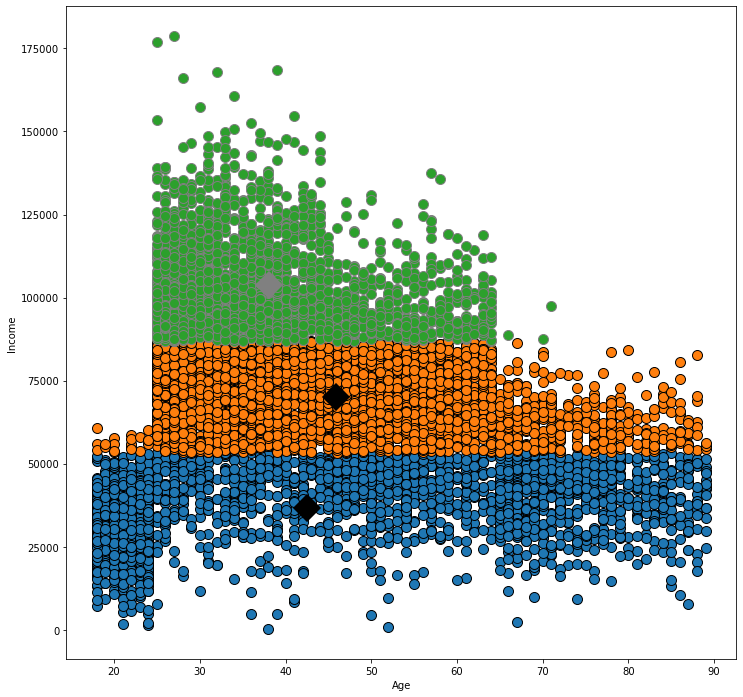

In [7]:
import mglearn
import matplotlib.pyplot as plt

list_clusters = range(0, 3)
#[0, 1, 2]

plt.figure(figsize=(12, 12))

# To plot all data points in their respective cluster form
mglearn.discrete_scatter(X['age'], X['income'], kmeans.labels_, markers='o')

# To plot the cluster centers
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], 
                         list_clusters, markers='D', 
                         markeredgewidth=10)

plt.xlabel('Age')
plt.ylabel('Income')

From the plot above we can see the data is not really clustered based on the two columns of Age and Income. It is only done on the Income that dominates the distance calculation. Therefore, we need to apply data scaling before we do clustering appropriately.

## 4. Improving the Model by Data Scaling

### Data Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

### Building another K-Means model on the scaled data:

In [12]:
kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(X_scaled_mm)

KMeans(n_clusters=3)

### Result Visualization

Text(0, 0.5, 'Income')

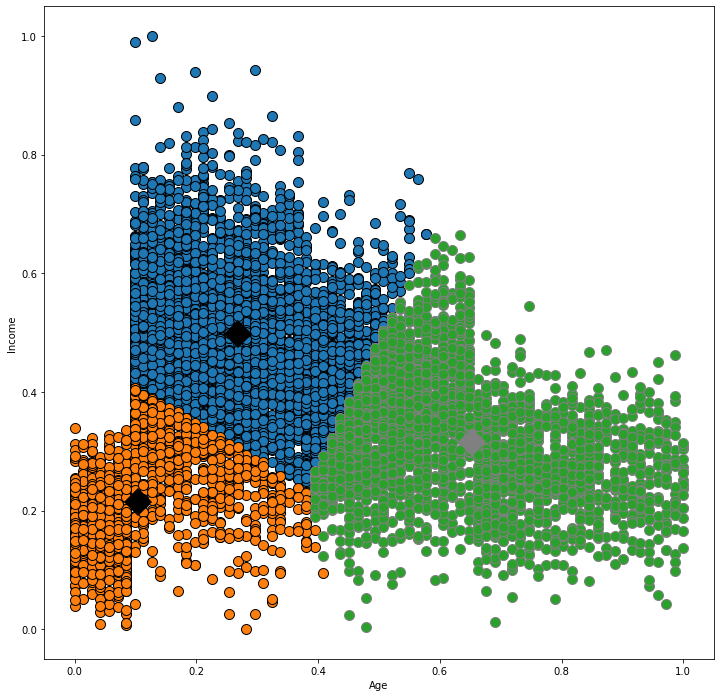

In [13]:
import mglearn
import matplotlib.pyplot as plt

list_clusters = range(0, 3)
#[0, 1, 2]

plt.figure(figsize=(12, 12))

# To plot all data points in respective cluster form
#mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(X_scaled_mm['age'], X_scaled_mm['income'], kmeans_scaled.labels_, markers='o')

# To plot the cluster centers
mglearn.discrete_scatter(kmeans_scaled.cluster_centers_[:, 0], 
                         kmeans_scaled.cluster_centers_[:, 1], 
                         list_clusters, markers='D', 
                         markeredgewidth=10)

plt.xlabel('Age')
plt.ylabel('Income')

## 5. Elbow Method

We can try different K values and plot the SSEs for all of them. From the plot, we can choose the Elbow Point, i.e., the best K.

We generate a series K-Means models by arying K from 1 to 15. A model's variable **inertia_** stores the overall **SSE** (sum of squared error) for the model.

In [70]:
errors = []
K = range(1, 16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled_mm)
    errors.append(kmeanModel.inertia_)

We plot the (K, SSE) pairs for all Ks:

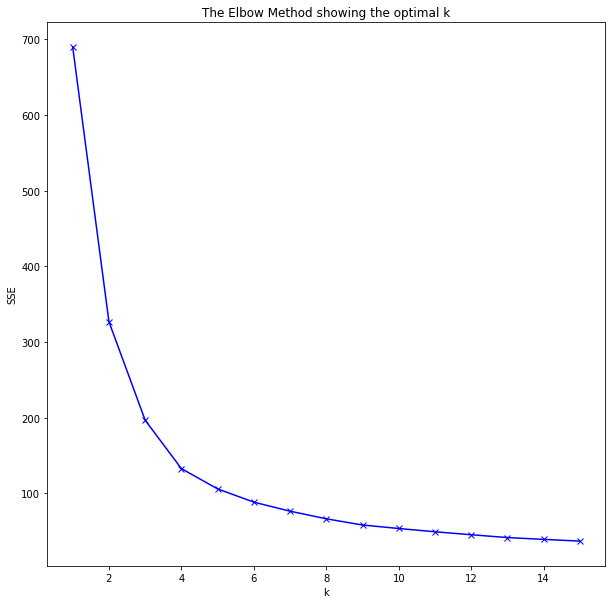

In [71]:
plt.figure(figsize=(10, 10))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Let's take a closer look by printing out the SSE decrease for each K:

In [72]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 363.21342298180895
K=3: 130.29642864088717
K=4: 63.99453792814475
K=5: 26.813878779589984
K=6: 17.503861788688525
K=7: 11.971539140729064
K=8: 10.055459284994868
K=9: 8.20483379260822
K=10: 4.607979130636828
K=11: 4.337272630854038
K=12: 3.921712066235081
K=13: 3.7196614024090024
K=14: 2.4228192974348346
K=15: 2.24489973627486


In this case, we can choose K=5, 6, or 7.

## 6. K-Means Fails

We generate synthetic two_moons data:

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

We plot the data:

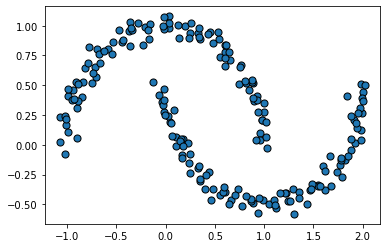

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')

We cluster the data into two clusters by using K-Means:

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

We plot the cluster assignments and cluster centers:

Text(0, 0.5, 'Feature 1')

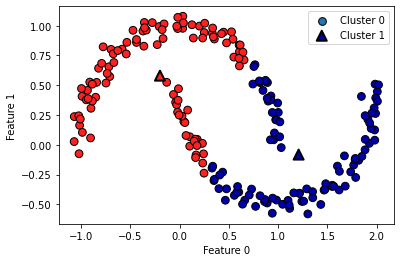

In [14]:
import mglearn

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.legend(["Cluster 0", "Cluster 1"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")